<a href="https://colab.research.google.com/github/gelabgaboo/codecademy/blob/main/Income_Classification_Log_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Income Classification using Logistic Regression
In this project, we will be using a dataset containing census information from the 1994 Census database to create a logistic regression model that predicts whether or not a person makes more than $50,000.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
col_names = ['age', 'workclass', 'fnlwgt','education', 'education-num',
'marital-status', 'occupation', 'relationship', 'race', 'sex',
'capital-gain','capital-loss', 'hours-per-week','native-country', 'income']

df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Codecademy_Projects_fjk/census_income_data/adult.data', names = col_names)

# clean columns by stripping extra whitespace for columns of type "object"
for col in df.select_dtypes(include=['object']).columns:
  df[col] = df[col].str.strip()
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


In [ ]:
# Check class Imbalance

print(df['income'].value_counts(normalize = True))

income
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64


In [ ]:
# Create feature dataframe X with feature columsn and dummy vairables for categorical features

feature_cols = ['age','capital-gain', 'capital-loss', 'hours-per-week', 'sex','race', 'hours-per-week', 'education']

x = pd.get_dummies(df[feature_cols], drop_first = True)

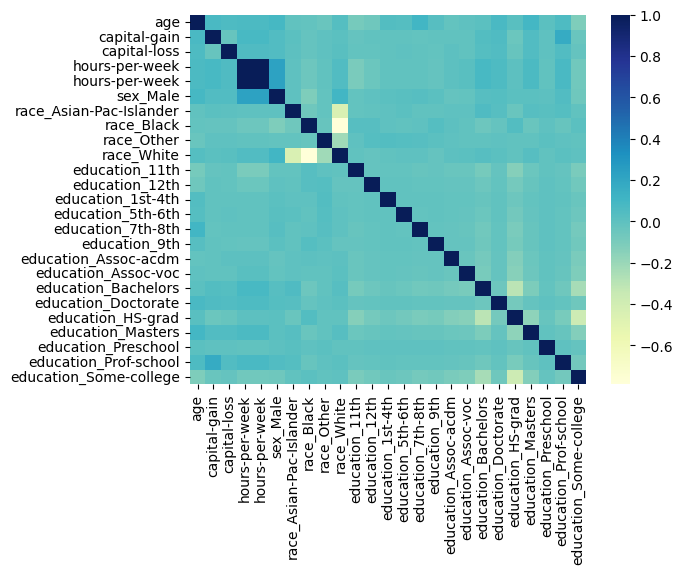

In [ ]:
#3. Create a heatmap of X data to see feature correlation
plt.figure()
sns.heatmap(x.corr(), cmap = 'YlGnBu')
plt.show()
plt.close()

In [ ]:
#4. Create output variable y which is binary, 0 when income is less than 50k, 1 when it is greater than 50k

y = np.where(df.income == '<=50K', 0,1)

In [ ]:
#5. Split data into a train and test set
#5. Fit LR model with sklearn on train set, and predicting on the test se

x_test, x_train, y_test,y_train = train_test_split(x,y, random_state=42, test_size = .2)

log_reg = LogisticRegression(C = .05, penalty = 'l1', solver = 'liblinear')
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)

In [ ]:
#6 print the model parameters (intercept and coefficients)
print(log_reg.coef_, ' Coefficient')
print(log_reg.intercept_, ' Intercept')


[[ 3.00521499e-02  3.21320626e-04  7.28311973e-04  1.18599381e-02
   1.58480452e-02  7.82669928e-01  0.00000000e+00 -3.76601292e-01
   0.00000000e+00  0.00000000e+00 -1.99915659e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -3.18766446e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  9.09836391e-01  5.72488043e-01
  -1.75277479e-01  1.13784331e+00  0.00000000e+00  8.59024517e-01
   0.00000000e+00]]  Coefficient
[-4.57089061]  Intercept


In [ ]:
#7. Evaluate the predictions of the model on the test set. Print the confusion matrix and accuracy score.

print('Confustion Matrix')
confusion_matrix(y_test, y_pred)

print(f'Accuracy Score: {log_reg.score(x_test,y_test)}')

Confustion Matrix
Accuracy Score: 0.8140356265356266


In [ ]:
dfCoeff = pd.DataFrame(zip(x_train.columns, log_reg.coef_[0]), columns = ['var', 'coef']).sort_values('coef')
dfCoeff.head()

,var,coef
7,race_Black,-0.376601
14,education_7th-8th,-0.318766
10,education_11th,-0.199916
20,education_HS-grad,-0.175277
12,education_1st-4th,0.000000


<Axes: xlabel='var', ylabel='coef'>

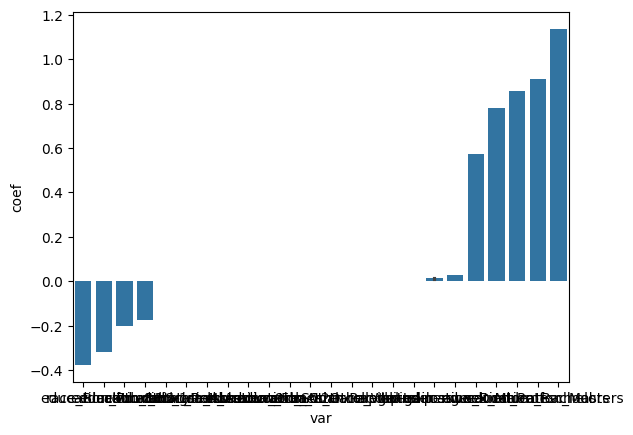

In [ ]:
sns.barplot(dfCoeff, x = 'var', y = 'coef')

ROC and AUC score: 0.8332217680044346


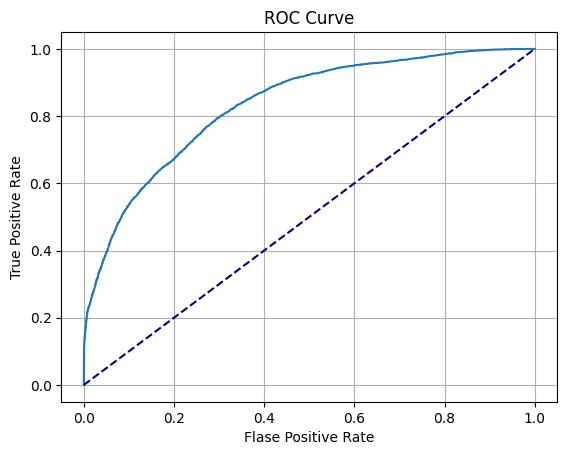

In [ ]:
# plot ROC and AUC curves

y_pred_prob = log_reg.predict_proba(x_test)
roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])

print(f'ROC and AUC score: {roc_auc}')

fpr, tpr, threshold = roc_curve(y_test, y_pred_prob[:,1])

plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('Flase Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1],[0,1], color='navy',linestyle='--')
plt.title('ROC Curve')
plt.grid()